<a href="https://colab.research.google.com/github/Ritchar/pdsei-2023-richard-robles/blob/Practicas/Laboratorio_1_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

import requests

url = "https://vvestman.github.io/summerschool19/sounds/Im_Superman.wav"
nombre_archivo = "Im_Superman.wav"

# Descarga el archivo desde la URL
response = requests.get(url)

# Guarda el archivo en tu sistema
with open(nombre_archivo, "wb") as archivo:
    archivo.write(response.content)

print(f"Archivo '{nombre_archivo}' descargado con éxito.")

Archivo 'Im_Superman.wav' descargado con éxito.


In [2]:
import IPython
IPython.display.Audio('Im_Superman.wav')

tasa de muestreo:44100 muestras/segundo
Tamaño de la señal:411889 muestras
Duración:9.340 segundos


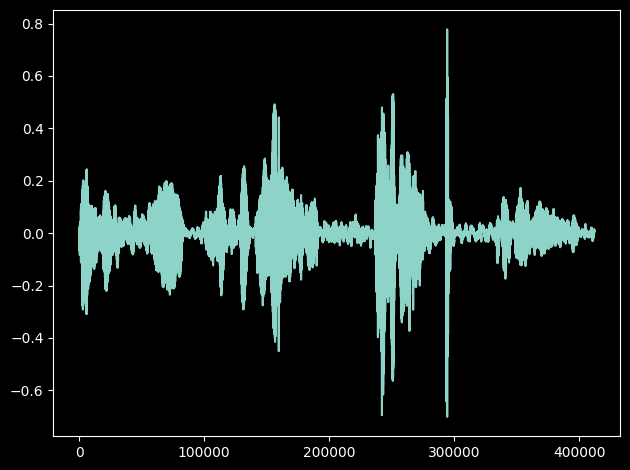

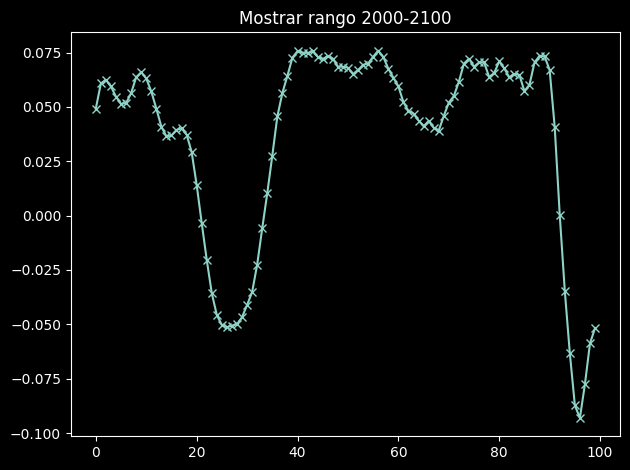

In [26]:
import soundfile
import matplotlib.pyplot as plt

audio_signal, sampling_rate =soundfile.read('Im_Superman.wav')

type(audio_signal)
print('tasa de muestreo:{} muestras/segundo'.format(sampling_rate))
print('Tamaño de la señal:{} muestras'.format(audio_signal.shape[0]))
print('Duración:{:.3f} segundos'.format(audio_signal.shape[0]/sampling_rate))
plt.plot(audio_signal)
plt.tight_layout()
plt.figure()
plt.plot(audio_signal[2000:2100],marker='x')
plt.title('Mostrar rango 2000-2100')
plt.tight_layout()

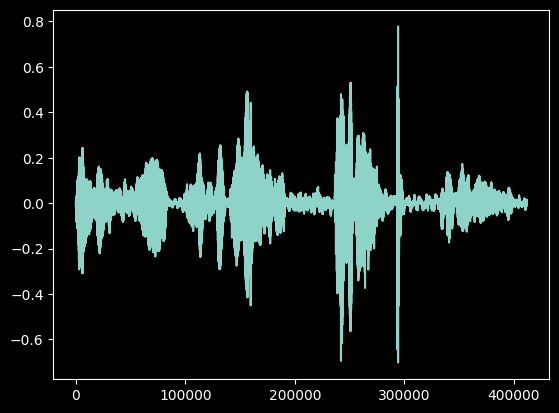

In [7]:
fm = sampling_rate
t=np.arange(0, len(audio_signal)) / fm
n = len(t)
amp = audio_signal
sen_ruido = amp
plt.plot(sen_ruido)

In [30]:
k=20
senial_filtrada = np.zeros(n)

for i in range(k, n-k-1):
  senial_filtrada[i]=np.mean(sen_ruido[i-k:i+k])
tama = 1000*(2*k+1)/fm

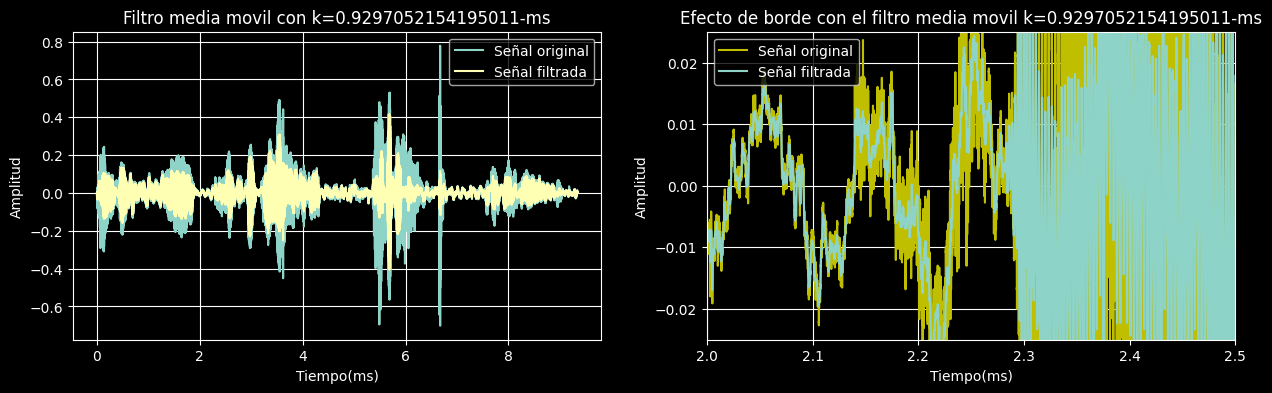

In [31]:
plt.subplots(1,2, figsize=(15,4))

plt.subplot(121)
plt.plot(t,sen_ruido,label="Señal original")
plt.plot(t,senial_filtrada,label="Señal filtrada")
plt.title(f"Filtro media movil con k={tama}-ms")
plt.xlabel("Tiempo(ms)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(t,amp, "y",label="Señal original")
plt.plot(t,senial_filtrada,label="Señal filtrada")
plt.title(f"Efecto de borde con el filtro media movil k={tama}-ms")
plt.xlabel("Tiempo(ms)")
plt.ylabel("Amplitud")
plt.axis([2,2.5,-0.025,0.025])
plt.grid()
plt.legend()
plt.show()

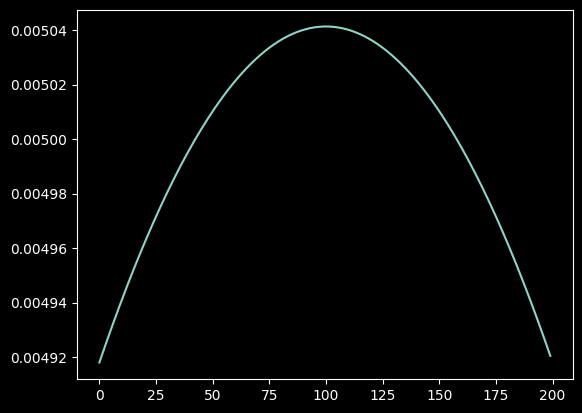

In [48]:
FWHM = 24
k =100

gauss_t = 1000*np.arange(-k, k)/fm

filtro_gaussiano= np.exp(-4*(np.log(2)*gauss_t**2)/FWHM**2)
filtro_gaussiano_normalizado = filtro_gaussiano/np.sum(filtro_gaussiano)
#filtro_gaussiano_normalizado = np.expand_dims(filtro_gaussiano_normalizado, axis=-1)
flanco_subida=np.argmin((filtro_gaussiano-.5)**2)
flanco_bajada= k+np.argmin((filtro_gaussiano[k:]-.5)**2)
FWHM_calculado= gauss_t[flanco_subida]-gauss_t[flanco_bajada]
plt.plot(filtro_gaussiano_normalizado)

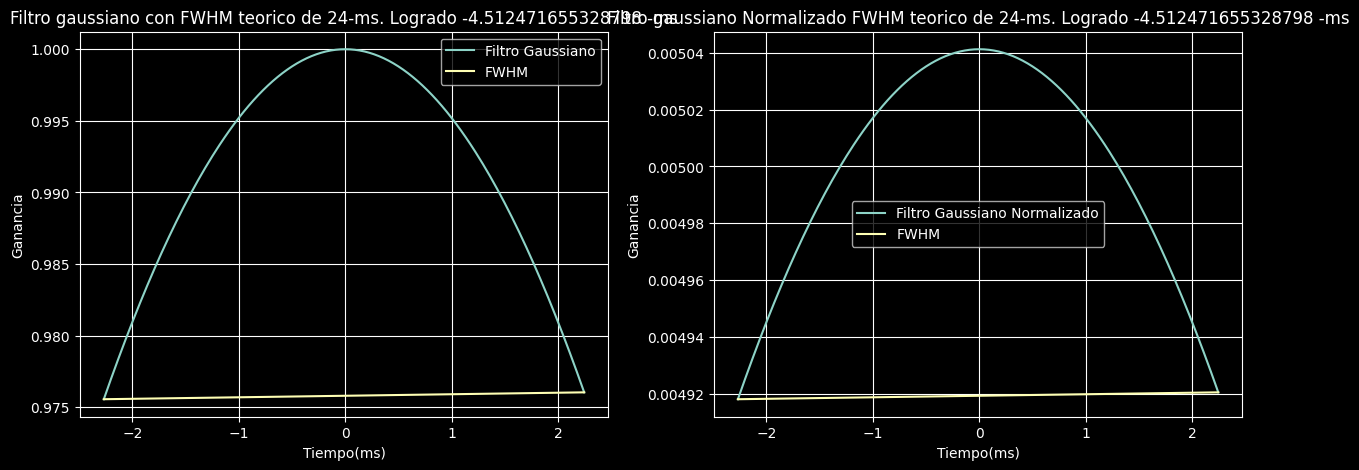

In [40]:
plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.plot(gauss_t,filtro_gaussiano,label="Filtro Gaussiano")
plt.plot([gauss_t[flanco_subida],gauss_t[flanco_bajada]],
        [filtro_gaussiano[flanco_subida],filtro_gaussiano[flanco_bajada]],
        label="FWHM")
plt.title(f"Filtro gaussiano con FWHM teorico de {FWHM}-ms. Logrado {FWHM_calculado} -ms")
plt.xlabel("Tiempo(ms)")
plt.ylabel("Ganancia")
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(gauss_t,filtro_gaussiano_normalizado,label="Filtro Gaussiano Normalizado")
plt.plot([gauss_t[flanco_subida],gauss_t[flanco_bajada]],
        [filtro_gaussiano_normalizado[flanco_subida],filtro_gaussiano_normalizado[flanco_bajada]],
        label="FWHM")
plt.title(f"Filtro gaussiano Normalizado FWHM teorico de {FWHM}-ms. Logrado {FWHM_calculado} -ms")
plt.xlabel("Tiempo(ms)")
plt.ylabel("Ganancia")
plt.grid()
plt.legend()
plt.show()

In [49]:
senial_filtrada_gauss = np.zeros_like(sen_ruido)

for i in range(k+1, n-k-1):
  senial_filtrada_gauss[i]=np.sum(sen_ruido[i-k:i+k]*filtro_gaussiano_normalizado)


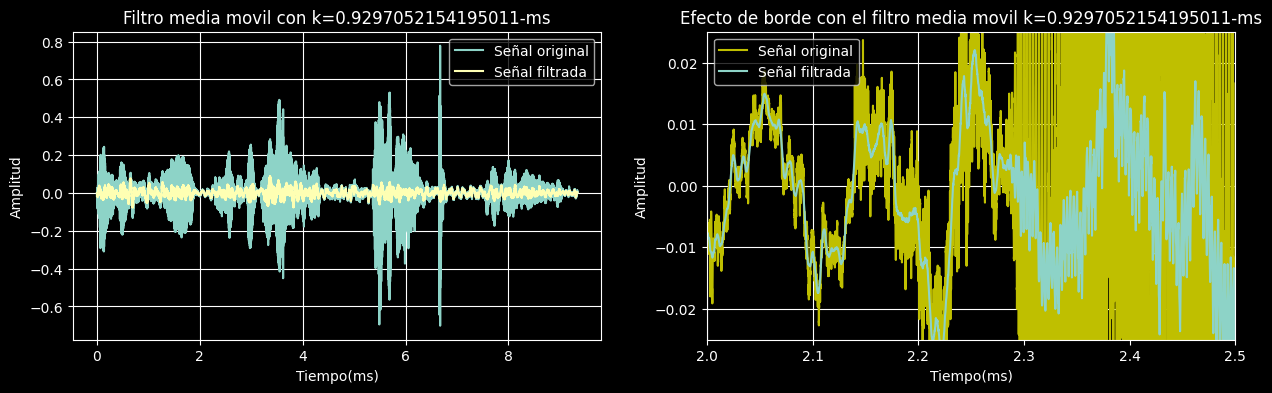

In [52]:
plt.subplots(1,2, figsize=(15,4))

plt.subplot(121)
plt.plot(t,sen_ruido,label="Señal original")
plt.plot(t,senial_filtrada_gauss,label="Señal filtrada")
plt.title(f"Filtro media movil con k={tama}-ms")
plt.xlabel("Tiempo(ms)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(t,amp, "y",label="Señal original")
plt.plot(t,senial_filtrada_gauss,label="Señal filtrada")
plt.title(f"Efecto de borde con el filtro media movil k={tama}-ms")
plt.xlabel("Tiempo(ms)")
plt.ylabel("Amplitud")
plt.axis([2,2.5,-0.025,0.025])
plt.grid()
plt.legend()
plt.show()

In [54]:
IPython.display.Audio(senial_filtrada_gauss,rate=fm)

In [55]:
IPython.display.Audio(senial_filtrada,rate=fm)